In [3]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import pandas as pd

### Read data

In [2]:
data = pd.read_csv('data_6_1.csv')

X = data[['x1', 'x2']]
print(X)

        x1     x2
0    10.28   8.92
1    -2.62   3.98
2     9.16  10.11
3    -4.32  10.84
4     0.20  10.70
..     ...    ...
195  10.90   8.57
196  -3.85   6.00
197  10.79   9.95
198  10.88  10.95
199   3.97  -5.42

[200 rows x 2 columns]


### Plot data

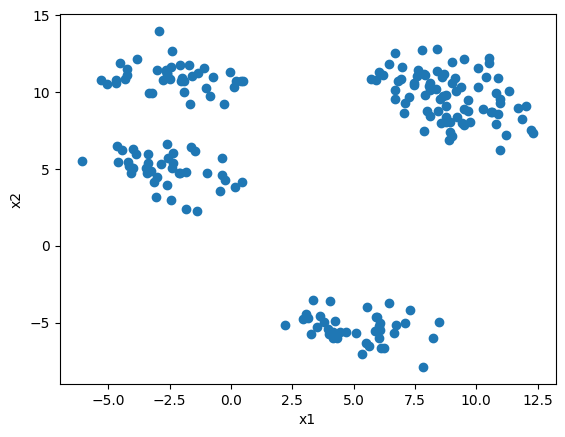

In [4]:
# Plot data points
plt.scatter(X['x1'], X['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### K-Mean Algo

In [5]:
KM = KMeans(n_clusters=5)
KM.fit(X)

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

### Debug result

In [6]:
print('centroids:', KM.cluster_centers_)
print('labels:', KM.labels_)

centroids: [[-2.32375    11.00025   ]
 [ 5.18325    -5.3345    ]
 [10.06527778  8.46805556]
 [-2.60925     4.949     ]
 [ 7.99204545 10.81590909]]
labels: [2 3 4 0 0 4 1 0 2 1 3 0 1 3 4 2 0 2 1 1 3 4 0 0 0 2 4 3 3 1 4 0 1 4 0 3 1
 2 2 3 1 2 2 3 4 4 0 2 1 1 0 0 4 4 4 1 4 3 3 3 1 1 4 1 3 4 2 3 0 3 0 0 2 3
 3 0 1 2 0 0 4 0 4 4 2 2 1 1 3 1 3 0 1 2 0 2 1 0 0 2 4 4 1 4 1 2 1 3 3 1 3
 2 4 4 1 0 4 4 4 2 2 4 0 0 3 3 3 0 0 1 1 3 1 4 0 4 4 0 4 3 2 4 1 1 0 0 4 2
 3 4 4 3 4 2 1 3 0 4 4 3 4 2 3 0 4 1 4 3 3 0 1 2 2 2 4 2 3 1 0 4 0 1 1 2 0
 3 2 1 3 3 2 1 3 4 0 2 3 2 2 1]


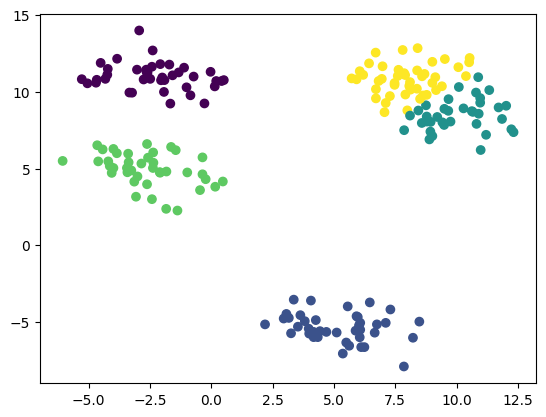

In [7]:
# Plot clusters
plt.scatter(X['x1'], X['x2'], c=KM.labels_)

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


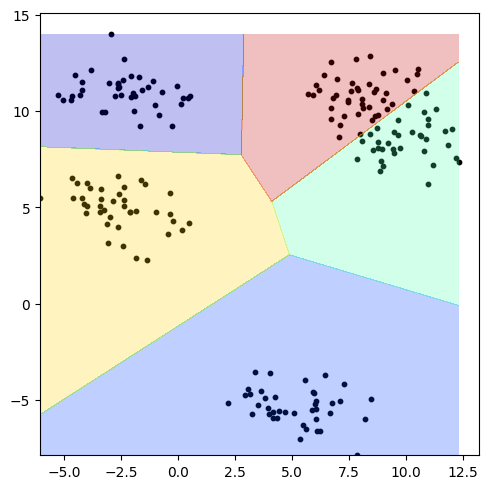

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(x=X['x1'], y=X['x2'], c="black", s=10)

step = 0.01
xx = np.arange(X['x1'].min(), X['x1'].max(), step)
yy = np.arange(X['x2'].min(), X['x2'].max(), step)
xx, yy = np.meshgrid(xx, yy)
xy = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)

z = KM.predict(xy)

plt.contourf(xx, yy, z.reshape(xx.shape), cmap=plt.cm.jet, alpha=0.25)
plt.tight_layout()
plt.show()

### Experience with Elbow method

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/clus

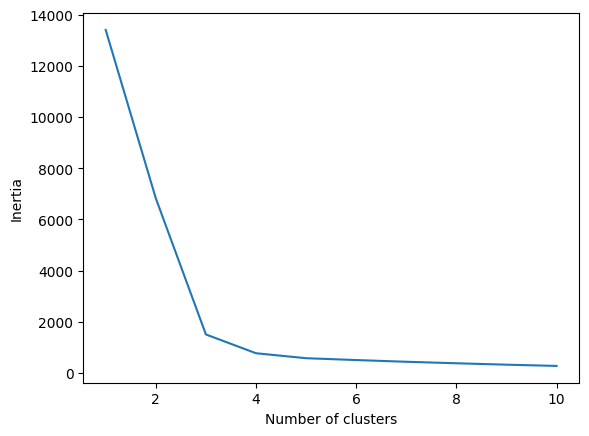

In [10]:
# Elbow method
inertia = []
for i in range(1, 11):
    KM = KMeans(n_clusters=i)
    KM.fit(X)
    inertia.append(KM.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [12]:
model = KMeans(n_clusters=4)
model.fit(X)

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

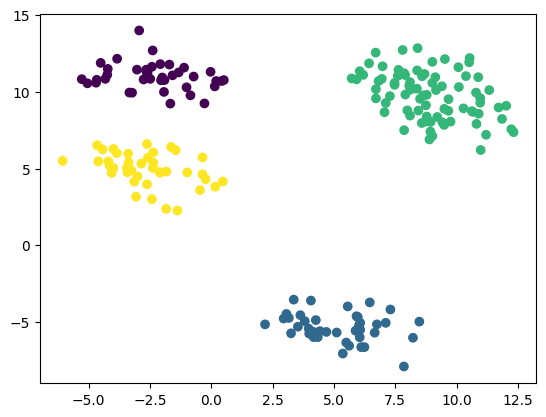

In [14]:
plt.scatter(X['x1'], X['x2'], c=model.labels_)